In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests

import time
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import  NoSuchElementException
from selenium.webdriver.common.keys import Keys
import re  



In [30]:
driver=webdriver.Chrome(r"C:\Users\sayan\OneDrive\Desktop\chromedriver_win32\chromedriver.exe")

#cars24



def create_data_for_cars24(city_name):
    
    brandList=[]
    modelList=[]
    variantList=[]
    manufacturingYearList=[]
    kmDrivenList=[]
    fuelList=[]
    ownerNumberList=[]
    locationList=[]
    priceList=[]

    
    driver.get("https://www.cars24.com/buy-used-cars/?utm_source=Google&utm_medium=CPC&utm_campaign=buycarsitelink&utm_source=google&utm_medium=adwords&utm_keyword=cars24&utm_matchtype=e&utm_device=c&adgroup_id=127360865230&campaign_id=1716307416&gclid=Cj0KCQiAnNacBhDvARIsABnDa6-gPiGJc0T8fTAeKL7SgSiZKRACXFLjqokLd8i7kEg8HDxt6lPk6JYaArl3EALw_wcB&gclid=Cj0KCQiAnNacBhDvARIsABnDa6-gPiGJc0T8fTAeKL7SgSiZKRACXFLjqokLd8i7kEg8HDxt6lPk6JYaArl3EALw_wcB")
    time.sleep(3)

  #  city=driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[3]/div/div/div/div[1]/div/div[2]/ul/li[1]/a")
  #  city.click()
    
    driver.execute_script("window.scrollTo(0, 500)")
    time.sleep(5)

    search_div=driver.find_element(By.XPATH,"//div[@class='_6QaMX']")
    search=search_div.find_element(By.TAG_NAME,"input")
    search.send_keys(city_name)
    city_div=driver.find_element(By.XPATH,'//ul[@class="popularCities _16Bvy"]') 
    city=city_div.find_element(By.TAG_NAME,"a")
    city.click()


    time.sleep(3)
    
   
        
    
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(10)

    Brand_year=driver.find_elements(By.XPATH,"//h2[@class='_3FpCg']")


    for i in Brand_year[0:200]:
        manufacturingYearList.append(i.text[0:4])
        modelList.append(i.text[5:len(i.text)])
        brandList.append(i.text.split(" ")[1])
    
    
    variant=driver.find_elements(By.XPATH,"//p[@class='cvakB']")

    for i in variant[0:200]:
        variantList.append(i.text)
    
    data=driver.find_elements(By.XPATH,"//UL[@class='bVR0c']")

    for i in data[0:200]:
        kmDrivenList.append(i.find_elements(By.TAG_NAME,"li")[0].text[0:-3])
        ownerNumberList.append(i.find_elements(By.TAG_NAME,"li")[1].text)
        fuelList.append(i.find_elements(By.TAG_NAME,"li")[2].text)
    
    
    price=driver.find_elements(By.XPATH,"//div[@class='_7udZZ']")
    for i in price[0:200]:
        priceList.append(i.text.replace("₹",""))


    df=pd.DataFrame({"Brand":brandList,"Model":modelList,"Variant":variantList,"Manufacturing Year":manufacturingYearList,"Driven KMs":kmDrivenList,"Fuel Type":fuelList,"Number Of Owners":ownerNumberList,"Price":priceList})
    df['Location'] = city_name
    df['Website']='Cars24'
    
    
    return df
    

#df_all_rows_cars24 = pd.concat([df, df1, df2, df3 ])
#df_all_rows_cars24



In [6]:
driver=webdriver.Chrome(r"C:\Users\sayan\OneDrive\Desktop\chromedriver_win32\chromedriver.exe")
#olx


def create_data_for_olx(city_name):
    
    brandList=[]
    modelList=[]
    variantList=[]
    manufacturingYearList=[]
    kmDrivenList=[]
    fuelList=[]
    ownerNumberList=[]
    locationList=[]
    priceList=[]

    
    driver.get("https://www.olx.in/cars_c84")
    time.sleep(3)
    

    search=driver.find_element(By.XPATH,"/html/body/div[1]/div/header/div/div/div[2]/div/div/div[1]/div/div[1]/input")
    search.click()
    search.send_keys(city_name)
    
    time.sleep(3)
    
   # auto_suggest_div=driver.find_element(By.XPATH,"//div[@class='_32lww']")
    elem = driver.find_element(By.XPATH,"//div[@class='_3_Rdm']")
    elem.click()
    time.sleep(3)
    
    
    for i in range(1,5):
        try:
            driver.find_element(By.XPATH,"//button[@class='rui-39-wj rui-3evoE rui-1JPTg']").click()
            time.sleep(3)
        except NoSuchElementException as e:
            print("exception occured")
            continue



            
  
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")


   
    li=driver.find_elements(By.XPATH,"//li[@class='_3V_Ww']/a")
    
    count=0
    
    for i in li:
        #print("loopppppppppp")
        href=i.get_attribute("href")
        #print(href)
        driver.execute_script('''window.open("'''+href+'''","_blank");''')
        count=count+1
        time.sleep(5)
        try:
            driver.switch_to.window(driver.window_handles[1])
        except IndexError as e:
            break
            
        if count==1:
            driver.refresh()
            time.sleep(5)
                
        
        
        try:
            brand_tag=driver.find_element(By.XPATH,"//h1[@class='_2iMMO']").text
            arr=brand_tag.split(" ")
            year=arr[len(arr)-1]
            year=re.sub("[()]", "", year)
            model=arr[len(arr)-2]
            brand=" ".join(arr[0:len(arr)-2])
            brandList.append(brand)
            modelList.append(model)
            manufacturingYearList.append(year)
        except StaleElementReferenceException as e:
            #print("Exception brand_tag")
            brandList.append("NULL")
            modelList.append("NULL")
            manufacturingYearList.append("NULL")
        except NoSuchElementException as e:
            #print("NoSuchElementException brand_tag")
            brandList.append("NULL")
            modelList.append("NULL")
            manufacturingYearList.append("NULL")
            
            

            
        #brand_tag="Maruti Suzuki Ignis (2020)"
        
        
       # print("year"," ",manufacturingYearList)
       # print("model"," ",modelList)
       # print("brandList"," ",brandList)
        
        
        #driver.close()
        try:
            variant=driver.find_element(By.XPATH,"//div[@class='BxCeR']").text
            variantList.append(variant)
            
        except StaleElementReferenceException as e:
            #print("Exception variant")
            variantList.append("NULL")
        except NoSuchElementException as e:
            #print("Exception variant")
            variantList.append("NULL")
            

        
        
       # print("variantList"," ",variantList)
        
        try:
            fuel=driver.find_element(By.XPATH,"//h2[@class='_3rMkw']").text
            fuelList.append(fuel)
        except StaleElementReferenceException as e:
            #print("Exception fuel")
            fuelList.append("NULL")
        except NoSuchElementException as e:
            #print("Exception fuel")
            fuelList.append("NULL")
            
            
        
        
       # print("fuelList"," ",fuelList)
        
        
        try:
            kmDriven=driver.find_element(By.XPATH,"//div[@class='_3rMkw']").text
            kmDrivenList.append(kmDriven)
        except StaleElementReferenceException as e:
            #print("Exception km")
            kmDrivenList.append("NULL")
        except NoSuchElementException as e:
            #print("NoSuchElementException km")
            kmDrivenList.append("NULL")
            
        
        
        
       # print("kmDrivenList"," ",kmDrivenList)
        

        
        try:
            price=driver.find_element(By.XPATH,"//div[@class='_1uqlc']").text
            priceList.append(price)
        except StaleElementReferenceException as e:
            #print("Exception price")
            priceList.append("NULL")
        except NoSuchElementException as e:
            #print("NoSuchElementException price")
            priceList.append("NULL")
            
            
        
        
       # print("priceList"," ",priceList)
        
        
        try:
            owner=driver.find_element(By.XPATH,"//div[@class='aznCj']").text
            ownerNumberList.append(owner)
        except StaleElementReferenceException as e:
            #print("Exception owner")
            ownerNumberList.append("NULL")
            
        except NoSuchElementException as e:
           
            #print("No such element owner")
            ownerNumberList.append("NULL")
            
        
        
        
       # print("ownerNumberList"," ",ownerNumberList)
        
    
        
        driver.close()
        
        driver.switch_to.window(driver.window_handles[0])
        
    
    df=pd.DataFrame({"Brand":brandList,"Model":modelList,"Variant":variantList,"Manufacturing Year":manufacturingYearList,"Driven KMs":kmDrivenList,"Fuel Type":fuelList,"Number Of Owners":ownerNumberList,"Price":priceList})
    df['Location'] = city_name
    df['Website']='OLX'
   
    
    return df





In [ ]:
df=create_data_for_cars24('Jaipur')
df1=create_data_for_cars24('Kolkata')
df2=create_data_for_cars24('Mumbai')
df3=create_data_for_cars24('Delhi')
df11=create_data_for_cars24('Chennai')
df12=create_data_for_cars24('Bangalore')



In [ ]:
df4=create_data_for_olx('Kolkata')
df5=create_data_for_olx('Delhi')
df6=create_data_for_olx('Mumbai')
df8=create_data_for_olx('Bangalore')
df9=create_data_for_olx('Nagpur')
df10=create_data_for_olx('Chennai')


In [33]:
df_all_rows = pd.concat([df,df1,df2,df3,df4,df5,df6,df8,df9,df10,df11,df12 ])


In [34]:
df_all_rows

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
195,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
196,Maruti,Maruti Alto K10,VXI Manual,2014,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
197,Tata,Tata NEXON,XZ+ 1.2 Manual,2020,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
198,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24


In [200]:
df_all_rows.to_csv('cars_price.csv')


In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
df=pd.read_csv('cars_price.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [4]:
df

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019.0,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018.0,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016.0,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015.0,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014.0,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017.0,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014.0,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020.0,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019.0,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24


In [5]:
df.head()

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019.0,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018.0,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016.0,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015.0,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014.0,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24


In [6]:
df.tail()

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017.0,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014.0,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020.0,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019.0,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24
2210,Maruti,Maruti Ritz,VXI Manual,2013.0,"66,671",Petrol,1st Owner,"4,04,000",Bangalore,Cars24


In [7]:
df

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019.0,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018.0,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016.0,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015.0,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014.0,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017.0,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014.0,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020.0,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019.0,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24


In [8]:
df.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing Year    float64
Driven KMs             object
Fuel Type              object
Number Of Owners       object
Price                  object
Location               object
Website                object
dtype: object

In [9]:
df.isnull().sum()

Brand                   21
Model                   21
Variant                 56
Manufacturing Year      21
Driven KMs              17
Fuel Type               17
Number Of Owners      1200
Price                   17
Location                 0
Website                  0
dtype: int64

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Number Of Owners']=imp.fit_transform(df['Number Of Owners'].values.reshape(-1,1))
df

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019.0,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018.0,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016.0,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015.0,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014.0,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017.0,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014.0,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020.0,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019.0,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24


In [11]:
df.isnull().sum()

Brand                 21
Model                 21
Variant               56
Manufacturing Year    21
Driven KMs            17
Fuel Type             17
Number Of Owners       0
Price                 17
Location               0
Website                0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing Year    0
Driven KMs            0
Fuel Type             0
Number Of Owners      0
Price                 0
Location              0
Website               0
dtype: int64

In [14]:
df

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019.0,"21,521",Petrol,1st Owner,"3,48,000",Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018.0,"46,809",Petrol,1st Owner,"5,27,000",Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016.0,"90,859",Petrol,1st Owner,"4,35,000",Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015.0,"95,615",Diesel,2nd Owner,"7,10,000",Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014.0,"32,716",Petrol,2nd Owner,"3,12,000",Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017.0,"22,390",Petrol,2nd Owner,"6,86,000",Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014.0,"38,841",Petrol,2nd Owner,"2,81,000",Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020.0,"25,946",Petrol,2nd Owner,"9,78,000",Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019.0,"18,051",Petrol,1st Owner,"14,44,000",Bangalore,Cars24


In [15]:
df['Number Of Owners'].value_counts()

1st Owner    1929
2nd Owner     207
3rd Owner      16
Name: Number Of Owners, dtype: int64

In [16]:
df.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing Year    float64
Driven KMs             object
Fuel Type              object
Number Of Owners       object
Price                  object
Location               object
Website                object
dtype: object

In [25]:
df['Manufacturing Year']=df['Manufacturing Year'].astype(int)

In [18]:
df['Price']=df['Price'].str.replace(',','')


In [19]:
df['Driven KMs']=df['Driven KMs'].str.replace(',','')

In [20]:
df['Price']=df['Price'].str.replace('₹','')

In [21]:
df['Price']=df['Price'].astype(str).astype(int)

In [22]:
df['Driven KMs']=df['Driven KMs'].str.replace('KM','')

In [23]:
df['Driven KMs']=df['Driven KMs'].astype(float).astype(int)

In [24]:
df.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing Year     int32
Driven KMs             int32
Fuel Type             object
Number Of Owners      object
Price                  int32
Location              object
Website               object
dtype: object

In [26]:
df

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,Renault,Renault Kwid,RXL Manual,2019,21521,Petrol,1st Owner,348000,Jaipur,Cars24
1,Honda,Honda Amaze,1.2 SMT I VTEC Manual,2018,46809,Petrol,1st Owner,527000,Jaipur,Cars24
2,Maruti,Maruti Swift,LXI OPT Manual,2016,90859,Petrol,1st Owner,435000,Jaipur,Cars24
3,Mahindra,Mahindra XUV500,W8 FWD Manual,2015,95615,Diesel,2nd Owner,710000,Jaipur,Cars24
4,Hyundai,Hyundai i10,MAGNA 1.1 IRDE2 Manual,2014,32716,Petrol,2nd Owner,312000,Jaipur,Cars24
...,...,...,...,...,...,...,...,...,...,...
2206,Maruti,Maruti Baleno,ZETA 1.2 K12 AMT Automatic,2017,22390,Petrol,2nd Owner,686000,Bangalore,Cars24
2207,Maruti,Maruti Alto K10,VXI Manual,2014,38841,Petrol,2nd Owner,281000,Bangalore,Cars24
2208,Tata,Tata NEXON,XZ+ 1.2 Manual,2020,25946,Petrol,2nd Owner,978000,Bangalore,Cars24
2209,Hyundai,Hyundai Creta,1.6 SX (O) VTVT Manual,2019,18051,Petrol,1st Owner,1444000,Bangalore,Cars24


In [27]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
le=LabelEncoder()
list1=['Brand','Model','Variant','Fuel Type','Number Of Owners','Location','Website']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df  

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,82,204,787,2019,21521,9,0,348000,3,0
1,23,87,63,2018,46809,9,0,527000,3,0
2,55,161,723,2016,90859,9,0,435000,3,0
3,47,143,1013,2015,95615,4,1,710000,3,0
4,26,109,735,2014,32716,9,1,312000,3,0
...,...,...,...,...,...,...,...,...,...,...
2206,55,149,1068,2017,22390,9,1,686000,0,0
2207,55,148,985,2014,38841,9,1,281000,0,0
2208,85,235,1047,2020,25946,9,1,978000,0,0
2209,26,96,186,2019,18051,9,0,1444000,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2210
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brand               2152 non-null   int32
 1   Model               2152 non-null   int32
 2   Variant             2152 non-null   int32
 3   Manufacturing Year  2152 non-null   int32
 4   Driven KMs          2152 non-null   int32
 5   Fuel Type           2152 non-null   int32
 6   Number Of Owners    2152 non-null   int32
 7   Price               2152 non-null   int32
 8   Location            2152 non-null   int32
 9   Website             2152 non-null   int32
dtypes: int32(10)
memory usage: 100.9 KB


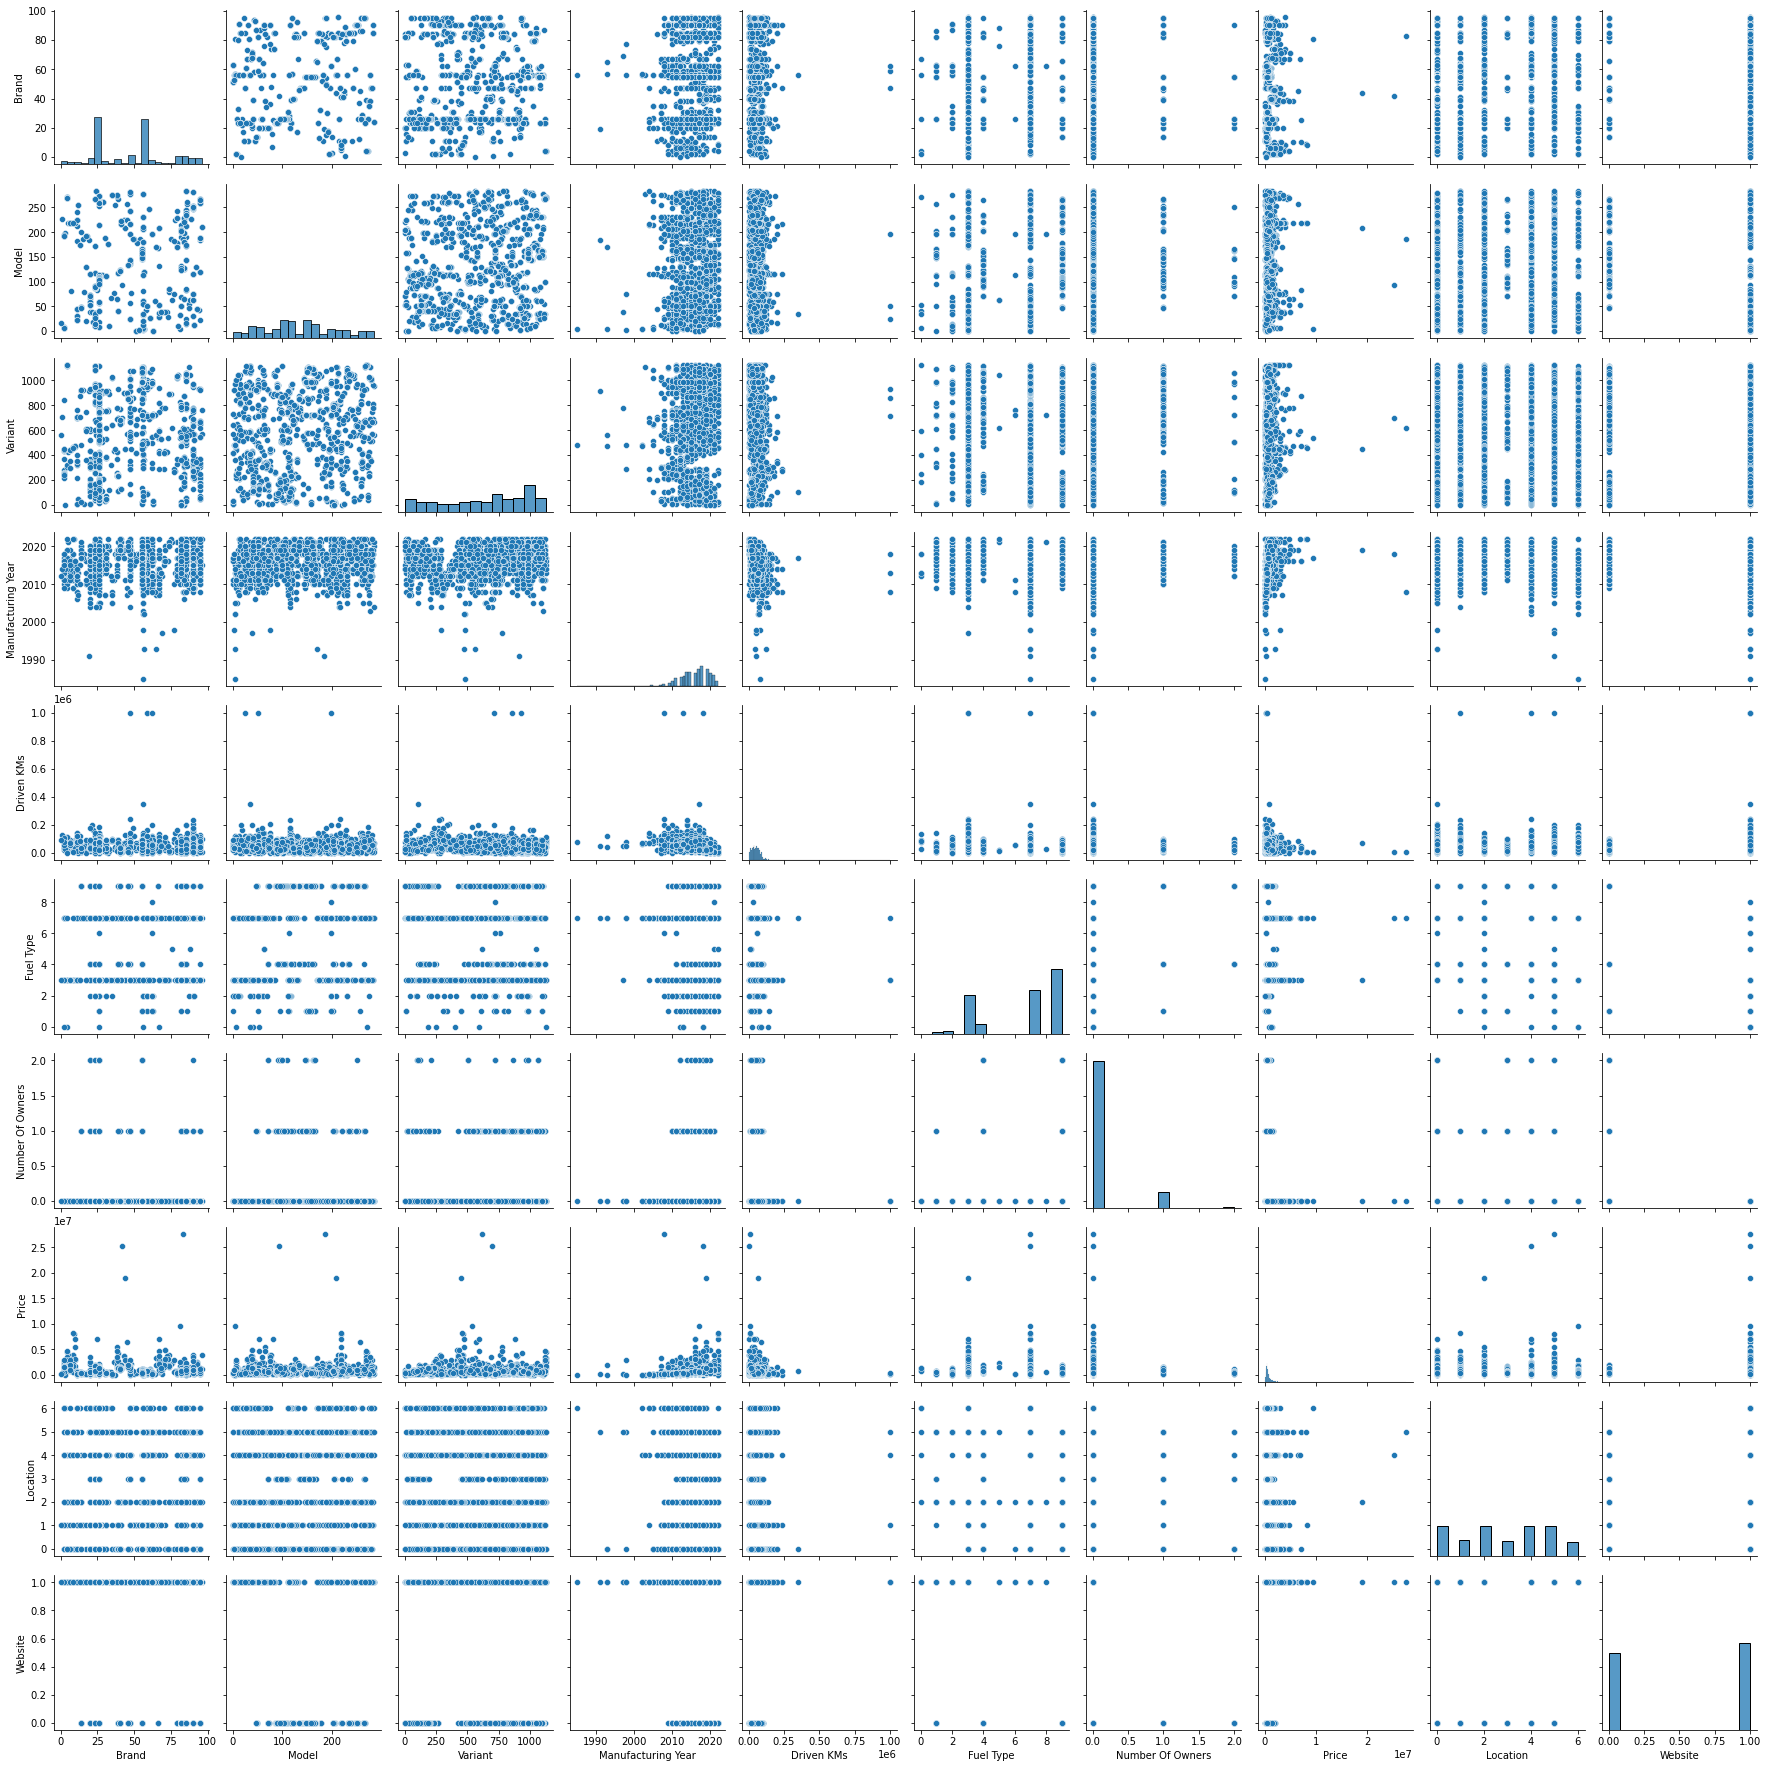

In [30]:
sns.pairplot(df)

Brand                    AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Model                 AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Variant               AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Manufacturing Year    AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
Driven KMs            AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
Fuel Type             AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
Number Of Owners      AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
Price                 AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
Location              AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
Website                  AxesSubplot(0.125,0.391471;0.0731132x0.222059)
dtype: object

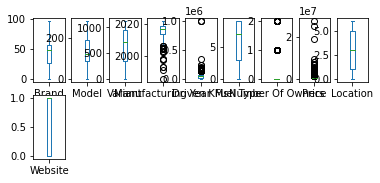

In [31]:
df.plot(kind='box',subplots=True,layout=(3,9))

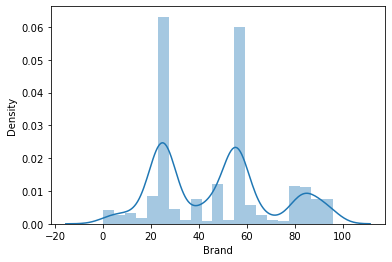

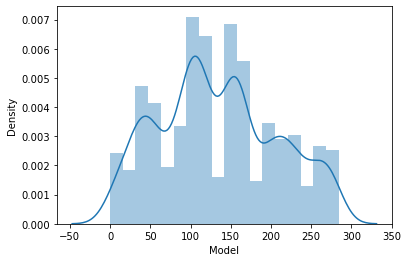

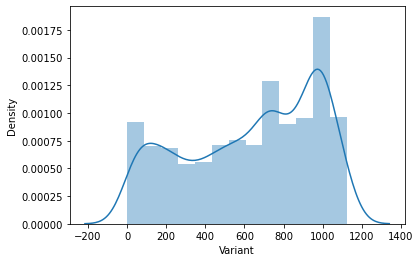

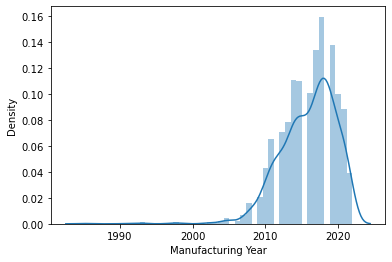

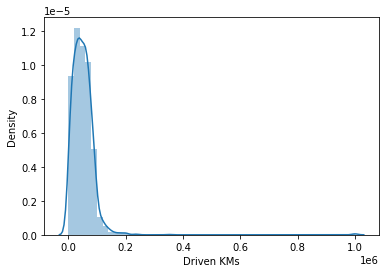

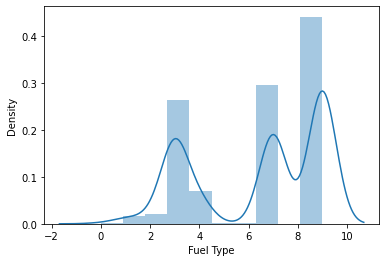

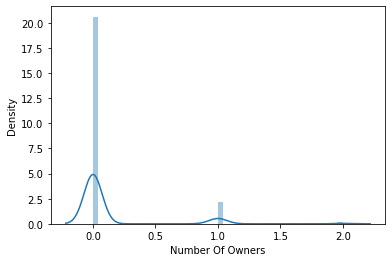

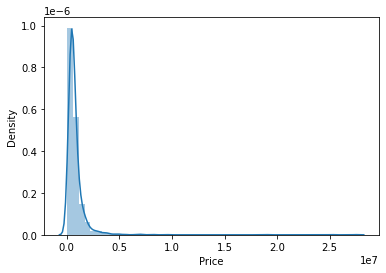

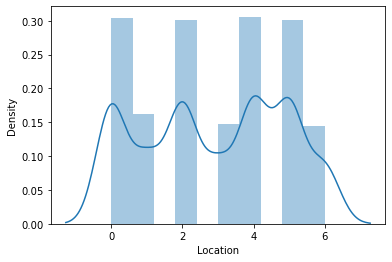

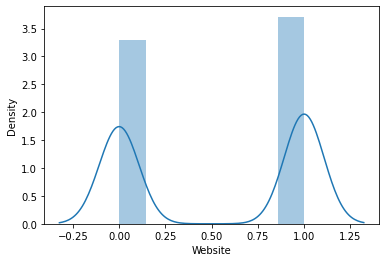

In [32]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

array([[<AxesSubplot:title={'center':'Brand'}>,
        <AxesSubplot:title={'center':'Model'}>,
        <AxesSubplot:title={'center':'Variant'}>],
       [<AxesSubplot:title={'center':'Manufacturing Year'}>,
        <AxesSubplot:title={'center':'Driven KMs'}>,
        <AxesSubplot:title={'center':'Fuel Type'}>],
       [<AxesSubplot:title={'center':'Number Of Owners'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Location'}>],
       [<AxesSubplot:title={'center':'Website'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

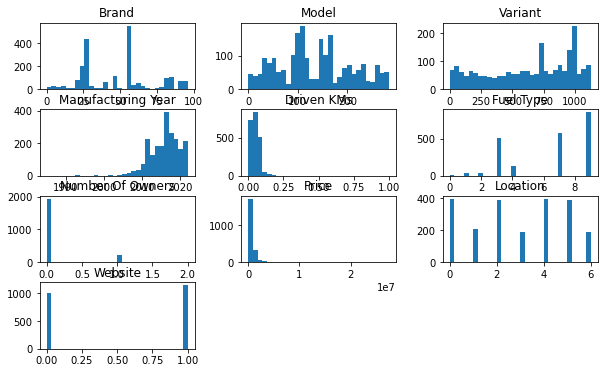

In [33]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30) 

In [34]:
df.describe()

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2.152000e+03,2152.000000,2152.000000
mean,46.873141,134.264870,634.538104,2015.970725,50879.606413,6.455855,0.111059,7.827089e+05,2.883829,0.530204
std,23.972636,72.950602,334.442963,3.831235,47583.890770,2.601166,0.337117,1.141496e+06,1.971550,0.499203
min,0.000000,0.000000,0.000000,1985.000000,12.000000,0.000000,0.000000,3.500000e+04,0.000000,0.000000
25%,26.000000,87.000000,352.750000,2014.000000,25730.500000,3.000000,0.000000,3.750000e+05,1.000000,0.000000
50%,48.500000,123.000000,715.000000,2017.000000,47045.500000,7.000000,0.000000,5.500000e+05,3.000000,1.000000
75%,56.000000,190.250000,947.000000,2019.000000,69000.000000,9.000000,0.000000,8.500000e+05,5.000000,1.000000
max,96.000000,284.000000,1125.000000,2022.000000,999999.000000,9.000000,2.000000,2.750000e+07,6.000000,1.000000


In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,1.465630,0.956145,0.455974,0.790862,0.617130,0.978306,0.329515,0.380912,0.058937,1.062349
1,0.996081,0.648053,1.709323,0.529789,0.085566,0.978306,0.329515,0.224064,0.058937,1.062349
2,0.339084,0.366568,0.264567,0.007643,0.840383,0.978306,0.329515,0.304679,0.058937,1.062349
3,0.005293,0.119768,1.131882,0.253430,0.940356,0.944356,2.637502,0.063711,0.058937,1.062349
4,0.870909,0.346409,0.300456,0.514503,0.381806,0.978306,2.637502,0.412457,0.058937,1.062349
...,...,...,...,...,...,...,...,...,...,...
2206,0.339084,0.202035,1.296372,0.268716,0.598863,0.978306,2.637502,0.084741,1.463062,1.062349
2207,0.339084,0.188324,1.048141,0.514503,0.253056,0.978306,2.637502,0.439621,1.463062,1.062349
2208,1.590802,1.381189,1.233567,1.051935,0.524114,0.978306,2.637502,0.171123,1.463062,1.062349
2209,0.870909,0.524653,1.341461,0.790862,0.690070,0.978306,0.329515,0.579454,1.463062,1.062349


In [36]:
threshold=3
print(np.where(z>3))

(array([  19,   39,   56,  152,  175,  369,  373,  546,  559,  839,  872,
        875,  892,  915,  923,  926,  947,  948, 1010, 1031, 1158, 1175,
       1195, 1219, 1220, 1228, 1239, 1246, 1269, 1295, 1358, 1384, 1398,
       1444, 1450, 1503, 1505, 1506, 1539, 1540, 1543, 1557, 1612, 1616,
       1655, 1708, 1737, 1759, 1794, 1802, 1840, 1916, 1920, 1953, 1973,
       2033, 2037, 2088, 2101, 2106], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 4, 3, 3, 4, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 7, 7, 3, 7, 3, 4, 3, 7, 7, 7, 7, 3, 3, 4, 7, 3, 4, 4, 4, 7, 3,
       3, 3, 3, 4, 7, 4, 7, 4, 3, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [62]:
df_new=df[(z<3).all(axis=1)]
df_new

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
0,82,204,787,2019,21521,9,0,348000,3,0
1,23,87,63,2018,46809,9,0,527000,3,0
2,55,161,723,2016,90859,9,0,435000,3,0
3,47,143,1013,2015,95615,4,1,710000,3,0
4,26,109,735,2014,32716,9,1,312000,3,0
...,...,...,...,...,...,...,...,...,...,...
2206,55,149,1068,2017,22390,9,1,686000,0,0
2207,55,148,985,2014,38841,9,1,281000,0,0
2208,85,235,1047,2020,25946,9,1,978000,0,0
2209,26,96,186,2019,18051,9,0,1444000,0,0


In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2210
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brand               2092 non-null   int32
 1   Model               2092 non-null   int32
 2   Variant             2092 non-null   int32
 3   Manufacturing Year  2092 non-null   int32
 4   Driven KMs          2092 non-null   int32
 5   Fuel Type           2092 non-null   int32
 6   Number Of Owners    2092 non-null   int32
 7   Price               2092 non-null   int32
 8   Location            2092 non-null   int32
 9   Website             2092 non-null   int32
dtypes: int32(10)
memory usage: 98.1 KB


In [39]:
df_new.skew()

Brand                 0.351166
Model                 0.206263
Variant              -0.395355
Manufacturing Year   -0.460637
Driven KMs            0.691300
Fuel Type            -0.515271
Number Of Owners      2.688207
Price                 2.526343
Location             -0.070028
Website              -0.097701
dtype: float64

In [64]:
df_new.corr()

,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Price,Location,Website
Brand,1.000000,0.275785,0.123839,0.094060,-0.003515,-0.024549,0.001566,-0.024820,-0.017706,0.009075
Model,0.275785,1.000000,0.203403,0.035287,-0.006584,0.002748,0.034836,0.054553,-0.046502,-0.077214
Variant,0.123839,0.203403,1.000000,0.111404,-0.118746,0.127802,0.070799,-0.036132,-0.001886,-0.173915
Manufacturing Year,0.094060,0.035287,0.111404,1.000000,-0.545171,0.186607,0.030331,0.354335,-0.083450,-0.346891
Driven KMs,-0.003515,-0.006584,-0.118746,-0.545171,1.000000,-0.403561,-0.036931,-0.125761,0.027777,0.292011
Fuel Type,-0.024549,0.002748,0.127802,0.186607,-0.403561,1.000000,0.188244,-0.265978,-0.068456,-0.616732
Number Of Owners,0.001566,0.034836,0.070799,0.030331,-0.036931,0.188244,1.000000,-0.071180,-0.066469,-0.347954
Price,-0.024820,0.054553,-0.036132,0.354335,-0.125761,-0.265978,-0.071180,1.000000,-0.062380,0.097858
Location,-0.017706,-0.046502,-0.001886,-0.083450,0.027777,-0.068456,-0.066469,-0.062380,1.000000,0.054717
Website,0.009075,-0.077214,-0.173915,-0.346891,0.292011,-0.616732,-0.347954,0.097858,0.054717,1.000000


<AxesSubplot:>

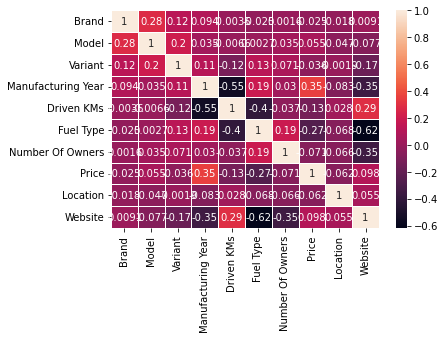

In [65]:
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5)

In [42]:
df_new.corr()['Price'].sort_values()

Fuel Type            -0.265978
Driven KMs           -0.125761
Number Of Owners     -0.071180
Location             -0.062380
Variant              -0.036132
Brand                -0.024820
Model                 0.054553
Website               0.097858
Manufacturing Year    0.354335
Price                 1.000000
Name: Price, dtype: float64

In [43]:
df_new.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing Year    0
Driven KMs            0
Fuel Type             0
Number Of Owners      0
Price                 0
Location              0
Website               0
dtype: int64

In [66]:
x=df_new.drop(["Price"],axis=1)
x


,Brand,Model,Variant,Manufacturing Year,Driven KMs,Fuel Type,Number Of Owners,Location,Website
0,82,204,787,2019,21521,9,0,3,0
1,23,87,63,2018,46809,9,0,3,0
2,55,161,723,2016,90859,9,0,3,0
3,47,143,1013,2015,95615,4,1,3,0
4,26,109,735,2014,32716,9,1,3,0
...,...,...,...,...,...,...,...,...,...
2206,55,149,1068,2017,22390,9,1,0,0
2207,55,148,985,2014,38841,9,1,0,0
2208,85,235,1047,2020,25946,9,1,0,0
2209,26,96,186,2019,18051,9,0,0,0


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x.shape

(2092, 9)

In [47]:
x.shape[1]

9

In [48]:
def vif_calc():
    vif=pd.DataFrame()
    vif["vif factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [49]:
vif_calc()

   vif factor            features
0    5.264546               Brand
1    4.998605               Model
2    4.983514             Variant
3   -0.390885  Manufacturing Year
4   -0.001191          Driven KMs
5   12.723659           Fuel Type
6    1.273211    Number Of Owners
7    3.191035            Location
8    3.802964             Website


In [67]:
y=df_new.iloc[:,-3]
y

0        348000
1        527000
2        435000
3        710000
4        312000
         ...   
2206     686000
2207     281000
2208     978000
2209    1444000
2210     404000
Name: Price, Length: 2092, dtype: int32

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.46484779,  0.95835615,  0.45008391, ..., -0.33138244,
         0.05768019, -1.05000598],
       [-0.99650011, -0.65441481, -1.70751082, ..., -0.33138244,
         0.05768019, -1.05000598],
       [ 0.33846824,  0.36562836,  0.2593573 , ..., -0.33138244,
         0.05768019, -1.05000598],
       ...,
       [ 1.59000107,  1.38567153,  1.22491074, ...,  3.01766138,
        -1.46974967, -1.05000598],
       [-0.87134683, -0.5303555 , -1.34095813, ..., -0.33138244,
        -1.46974967, -1.05000598],
       [ 0.33846824,  0.32427526,  1.04014434, ..., -0.33138244,
        -1.46974967, -1.05000598]])

In [68]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [82]:
lr=LinearRegression()
knr=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor(n_estimators=400,random_state=50)
model=[lr,knr,dtr,svr,rf]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("predicted price:",m,predm)
    print("actual price:",m,y_test)
    print('r2_score:', r2_score(y_test,predm))
    print('error:')
    print('mean absolute error:',m,mean_absolute_error(y_test,predm))
    print('mean squared error:',m,mean_squared_error(y_test,predm))
    print('root mean squarred error:',m,np.sqrt(mean_squared_error(y_test,predm)))

predicted price: LinearRegression() [ 482727.77081388  983408.01078382  942013.92895931 1033417.45765948
  761343.24182573  763676.21848369  427008.47119287  623604.82395548
  182112.70286083  953391.89703217  602293.65740463 1087402.00068581
  778242.76848507 1123746.0811463   694519.09903175  511566.05292025
  916738.04628986  897760.85448098  833121.85943255  762319.12985647
 1289049.84012544  497176.65290883  658445.79934505 1047995.08343279
  410099.76600429  629521.76618597  513325.9342289   771648.46891633
  930046.01410401  182455.36543107  944202.36245838 1087966.85322025
 1238953.81640002  601208.92741039  633648.55037647  360392.12312534
  812881.4373754   755671.49254709  611657.85956493  263537.71398816
  787709.29479706  344107.90442115  641884.30499998  577761.15236643
  436297.77341807  520622.83626112  544689.39097416  899180.12018496
  691317.57362252  890305.53587651   82291.41904896  411536.06871718
  931962.60929933  331744.95675871  952995.84511241 1083807.0643712

In [83]:
predrf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
for j in range(4,9):
    rfscore=cross_val_score(rf,x,y,cv=j)
    rfcv=rfscore.mean()
    print('at cv:-',j)
    print('crossvalidation score:',rfcv*100)
    print('r2_score:', r2_score(y_test,predrf))
    print('\n')

at cv:- 4
crossvalidation score: 58.61370482057766
r2_score: 0.7029994896204437


at cv:- 5
crossvalidation score: 57.51397416374399
r2_score: 0.7029994896204437


at cv:- 6
crossvalidation score: 63.0542310169104
r2_score: 0.7029994896204437


at cv:- 7
crossvalidation score: 61.83572437571786
r2_score: 0.7029994896204437


at cv:- 8
crossvalidation score: 61.961005261356284
r2_score: 0.7029994896204437




In [84]:
from sklearn. linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [89]:
lasscv=LassoCV(alphas=None,cv=10,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [90]:
alpha=lasscv.alpha_
alpha

36.43915041267054

In [91]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=36.43915041267054)

In [97]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=36.43915041267054)

In [98]:
lasso_reg.score(x_test,y_test)

0.27488812904124516

In [93]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.0257028 , 8.81649911, 5.91063575, 2.24507063, 2.0144673 ,
       4.65149868, 0.66048062, 1.35006998, 8.22329692, 2.29051879,
       0.39108899, 0.92311271, 8.79736568, 6.79834872, 8.61511689,
       2.4110645 , 4.3864994 , 5.07178347, 1.99919938, 1.89931676,
       3.50803468, 9.35667196, 9.46383061, 2.00288774, 9.99380043,
       4.8406096 , 3.17272645, 7.80635745, 5.90596003, 5.16054   ,
       0.6830677 , 6.39574326, 5.14439787, 3.84461414, 0.59534833,
       6.897924  , 7.93153376, 1.40686601, 1.07758772, 0.07696937,
       8.1991404 , 8.47064566, 4.29815756, 4.15022337, 1.79834582,
       6.70388314, 0.7248519 , 2.67250668, 7.10640323, 7.07634784]),
        cv=10, normalize=True)

In [94]:
ridgecv.alpha_

0.07696936814929556

In [95]:
ridge_reg=Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.07696936814929556)

In [96]:
ridge_reg.score(x_test,y_test)

0.2748714368873968

In [106]:
RandomForestRegressor()

RandomForestRegressor()

In [107]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':["squared_error", "absolute_error", "poisson"],
            'n_estimators':[100,200,300,400,500]}

In [108]:
gcv=GridSearchCV(estimator=RandomForestRegressor(),
                 param_grid= parameters,
                 cv=6,
                 scoring="accuracy")

In [110]:
#taking long running time
gcv.fit(x_train,y_train)

In [112]:
gcv.best_params_

In [ ]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

In [ ]:
gcv.best_score_

In [99]:
import joblib

In [100]:
# as i see random forest regressor is giving high score
joblib.dump(rf,'rf_car price.obj')

['rf_car price.obj']